# המגיש: ולדילסב גוטיינר ת.ז:320489735 # 

In [11]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

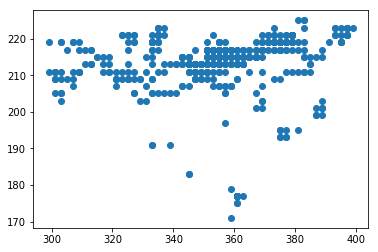

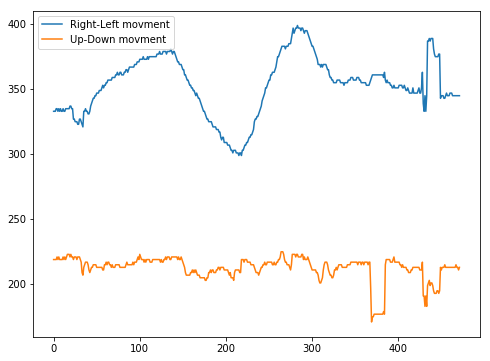

-1

In [39]:
eye = cv2.VideoCapture('film.mp4')
#out = cv2.VideoWriter('tracked_eye_trace.avi', -1, 50.0, (640,480))
time=0
x = []
y = []
n = np.arange(850)
retval, frame = eye.read()
canvas = np.zeros_like(frame)
time=[]
t=0
while (retval == True):
    retval ,frame = eye.read()
    if retval == True:
        cop = frame.copy()
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray,(5,5),0)
        edges = cv2.Canny(blur,200,100)
        
        circles = cv2.HoughCircles(edges,method = cv2.HOUGH_GRADIENT , dp = 2,minDist=0.1, param1=60,param2=20,minRadius=1,maxRadius=20)
        
        for i in range(len(circles)):
            if  circles[0][i][0]< 450 and circles[0][i][1]<250 and circles[0][i][1]>150:
                cv2.circle(frame,(circles[0][i][0],circles[0][i][1]),circles[0][i][2],(255,0,0),3)
                cv2.circle(canvas,(circles[0][i][0],circles[0][i][1]),1,(0,0,255),3)
                x.append(np.float32(circles[0][i][0]))
                y.append(np.float32(circles[0][i][1]))
                t=t+1
                time.append(t)
        canvas = np.uint8(canvas*0.95) # fade out canvas   
        img = cv2.add(frame, canvas)
        cv2.imshow('Eye',img)
        #out.write(img)
        if cv2.waitKey(1) & 0xff ==27:
            break
plt.scatter(np.array(x),np.array(y))
plt.show()
plt.figure(figsize=(8,6))
plt.plot(x)
plt.plot(y)
plt.legend(['Right-Left movment','Up-Down movment'])
plt.show()
eye.release()
#out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

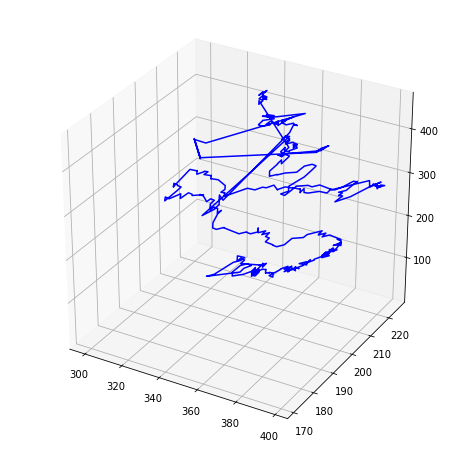

In [40]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

ax.plot3D(x, y, time, 'blue')
plt.show()